In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

In [2]:
boston=load_boston()
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()   #the parameter which combined to form this utils dataframe

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
print(boston.DESCR)  #give all the relevant information about dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#creating dataframe for our further operations
df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
#adding target variable into dataframe
df["Target"]=boston.target

In [18]:
df.isnull().values.any()  #uif null value is present return True else return false

False

In [19]:
df.dtypes  #checking the data type of each feature

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [28]:
df.columns   #index of every feature present in dataset

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target'],
      dtype='object')

In [27]:
len(df.columns)  #to number of features present in dataframe

14

In [23]:
df.describe().T  #statistical description about dataset

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Data Visualization

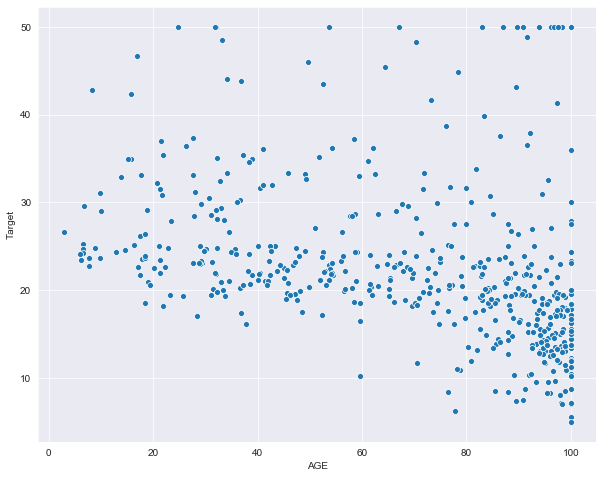

In [90]:
#effect of crime on house price
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot("AGE","Target",data=df)
plt.show()

Aged people prefer to buy low cost flat

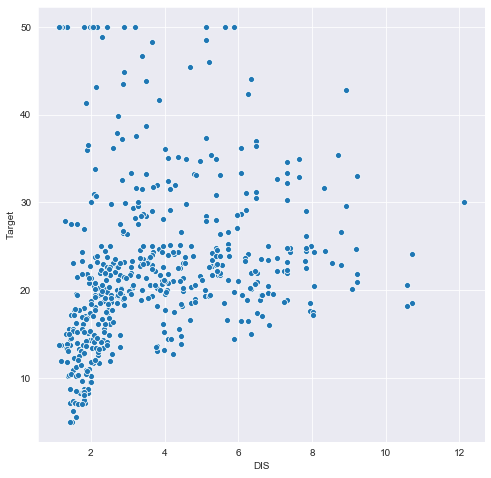

In [91]:
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.scatterplot("DIS","Target",data=df)
plt.show()

people prefers to live near employement center so the price of flats are getting higher ws we go near the employement centers

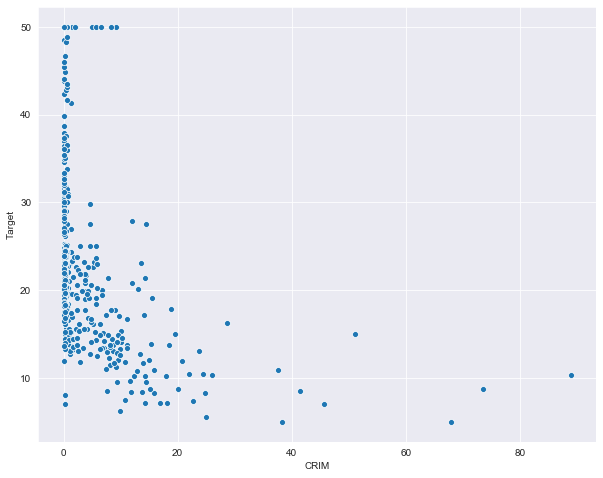

In [96]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot("CRIM","Target",data=df)
plt.show()

People prefer to live in low crime area so when crime increase the cost of flat decreases near to minimum price

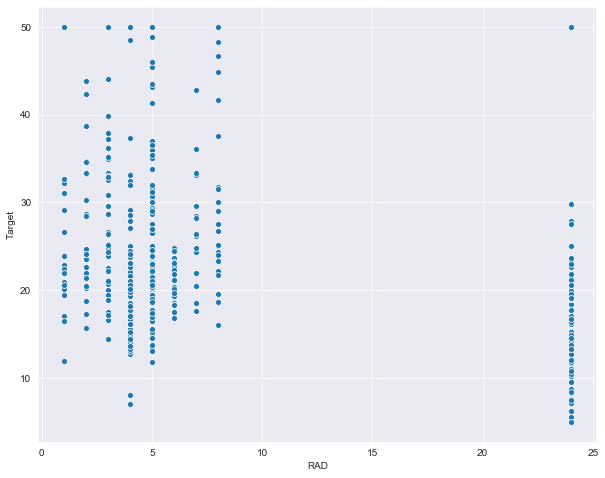

In [98]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot("RAD","Target",data=df)
plt.show()

Here we will  getting ambiguity about the flat prices near highway

## Pre Modeling Step & prediction without hyperparameter Tuning

In [100]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [123]:
#normalization of data
normalize=MinMaxScaler()
x_scaled=normalize.fit_transform(X)
y_scaled=normalize.fit_transform(np.array(Y).reshape(-1,1))

In [124]:
#Splitting the data into training and teting set
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [125]:
reg=RandomForestRegressor()
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_test)

In [131]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print(r2_score(Y_test,Y_pred))

0.8872169023402274


In [136]:
print(mean_absolute_error(Y_test,Y_pred))
print(np.sqrt(mean_squared_error(Y_test,Y_pred)))
print((mean_squared_error(Y_test,Y_pred)))

2.151147058823528
3.071709307312046
9.43539806862745


## Prediction after hyperparameter tuning

In [164]:
param_grid={"n_estimators":[50,60,70],
            "min_samples_split":[2,3,4,5],
            "min_samples_leaf":[2,3,4,5],
            "criterion":["mse","mae"]
            }

In [165]:
clf_=RandomForestRegressor()
grid_cv=GridSearchCV(estimator=clf_,param_grid=param_grid,cv=5,n_jobs=-1)
grid_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 70]})

In [166]:
grid_cv.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [167]:
grid_cv.best_score_

0.8631588561802317

In [168]:
clf_=RandomForestRegressor(criterion= 'mse',min_samples_leaf= 2,min_samples_split=4,n_estimators= 60)
clf_.fit(X_train,Y_train)
predicted=clf_.predict(X_test)

In [170]:
print(r2_score(Y_test,Y_pred))
print(mean_absolute_error(Y_test,predicted))
print(np.sqrt(mean_squared_error(Y_test,predicted)))
print((mean_squared_error(Y_test,predicted)))

0.8872169023402274
2.117837216115402
3.1264483150623263
9.77467906675606


## Getting final output

In [172]:
result=pd.DataFrame({"Actual":Y_test,"Predicted":predicted})
top_20=result.head(20)

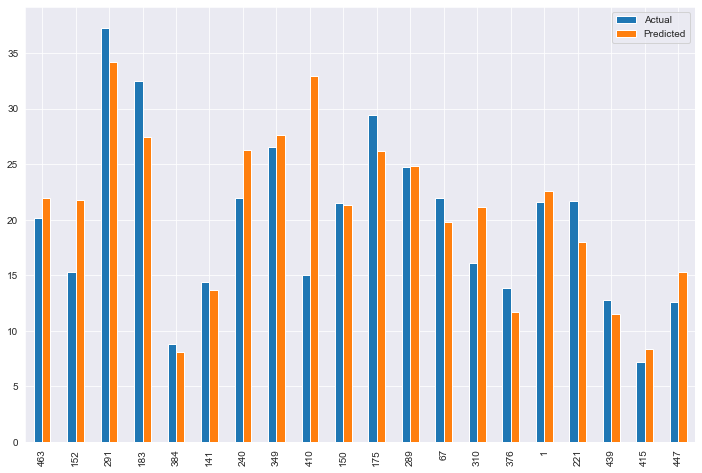

In [179]:
top_20.plot(kind="bar",figsize=(12,8))
plt.show()

In [ ]:
wo that approximately near to the output